In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
import spacy
from textblob import TextBlob
import emoji

import utils

## Remove Html tags

In [2]:
# . --> any character, * --> zero or more occurance, ? --> zeor or one occurance

def remove_html_tags(text):
    pattern = re.compile(pattern=r"<.*?>")
    return pattern.sub(repl="", string=text)

In [3]:
text = "<p>Hi this is alamin bhuyan</p>"

print(remove_html_tags(text=text))

Hi this is alamin bhuyan


In [4]:
pattern = re.compile(pattern=r"<.*?>")
utils.highlight_regex_matches(pattern=pattern, text=text)

<p>Hi this is alamin bhuyan</p>


In [5]:
text2 = """<li class="nav-item"><a class="nav-link active" aria-current="page" href="#">Contact</a></li>"""

print(remove_html_tags(text=text2))

Contact


In [6]:
utils.highlight_regex_matches(pattern=pattern, text=text2)

<li class="nav-item"><a class="nav-link active" aria-current="page" href="#">Contact</a></li>


In [7]:
df = pd.read_csv("IMDB Dataset.csv", nrows=10)

df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [8]:
df['review'].apply(func=remove_html_tags)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

## Remove url

In [9]:
def remove_url(text):
    pattern = re.compile(pattern=r"https?://\S+|www\.\S+")
    return pattern.sub(repl='', string=text)

In [10]:
text4 = "Check out my notebook https://www.kaggle.com/campusx/notebook2568cc"
text5 = "Check out my notebook http://www.kaggle.com/campusx/notebook2568cc"
text6 = "Google search here www.google.com"
text7 = "For notebook click https://www.kaggle.com/campusx/notebook2568cc to search check www.google.com"
text8 = "This is my webpage link: https://www.codewithalamin.com"

In [11]:
print(remove_url(text=text4))
print(remove_url(text=text5))
print(remove_url(text=text6))
print(remove_url(text=text7))
print(remove_url(text=text8))

Check out my notebook 
Check out my notebook 
Google search here 
For notebook click  to search check 
This is my webpage link: 


## Extract URL

In [12]:
def url_extract(text):
    pattern = re.compile(pattern=r"https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+")
    # pattern = re.compile(pattern=r"https?://www.[a-z]+.com")
    print(re.findall(pattern=pattern, string=text))

In [13]:
url_extract(text=text4)
url_extract(text=text8)

['https://www.kaggle.com']
['https://www.codewithalamin.com']


## Chat word Treatment

In [14]:
chat_words = {
    "AFAIK" : "As Far As I Know",
    "AFK" : "Away From Keyboard",
    "ASAP" : "As Soon As Possible",
    "ATK" : "At The Keyboard",
    "ATM" : "At The Moment",
    "A3" :  "Anytime, Anywhere, Anyplace",
    "BAK" : "Back At Keyboard",
    "BBL" : "Be Back Later",
    "BBS" : "Be Back Soon",
    "BFN" : "Bye For Now",
    "B4N" : "Bye For Now",
    "BRB" : "Be Right Back",
    "BRT" : "Be Right There",
    "BTW" : "By The Way",
    "B4" :  "Before",
    "B4N" : "Bye For Now",
    "CU" :  "See You",
    "CUL8R":"See You Later",
    "CYA" : "See You",
    "FAQ" : "Frequently Asked Questions",
    "FC" :  "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI" : "For Your Information",
    "GAL" : "Get A Life",
    "GG" :  "Good Game",
    "GN" :  "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8" : "Great!",
    "G9" :  "Genius",
    "IC" :  "I See",
    "ICQ" : "I Seek you (also a chat program)",
    "ILU" : "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO" : "In My Opinion",
    "IOW" : "In Other Words",
    "IRL" : "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR" : "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL" : "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R" : "Later",
    "MTE" : "My Thoughts Exactly",
    "M8" :  "Mate",
    "NRN" : "No Reply Necessary",
    "OIC" : "Oh I See",
    "PITA": "Pain In The A..",
    "PRT" : "Party",
    "PRW" : "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO" : "Rolling On The Floor Laughing My A.. Off",
    "SK8" : "Skate",
    "STATS" : "Your sex and age",
    "ASL" : "Age, Sex, Location",
    "THX" : "Thank You",
    "TTFN" : "Ta-Ta For Now!",
    "TTYL" : "Talk To You Later",
    "U" : "You",
    "U2" : "You Too",
    "U4E" : "Yours For Ever",
    "WB" : "Welcome Back",
    "WTF" : "What The F...",
    "WTG" : "Way To Go!",
    "WUF" : "Where Are You From?",
    "W8" : "Wait...",
    "7K" : "Sick:-D Laugher"
    }

chat_words

{'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'A3': 'Anytime, Anywhere, Anyplace',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'B4N': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'B4': 'Before',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': "For What It's Worth",
 'FYI': 'For Your Information',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GN': 'Good Night',
 'GMTA': 'Great Minds Think Alike',
 'GR8': 'Great!',
 'G9': 'Genius',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'ILU: I Love You',
 'IMHO': 'In My Honest/Humble Opinion',
 'IMO': 'In My Opinion',
 'IOW': 'In Other Words',
 'IRL': 'In Real Life',
 'KISS': 'Keep It Simple, Stupid',
 'LDR': 'Long Distance Relationship',
 'LM

In [15]:
# Demo test

dic = {'name': 'alamin', 'age' : 22}

print("Yes") if "name" in dic else print("No")

# Demo test end

Yes


In [16]:
def chat_conversion(text):
    new_text = []
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words.get(word.upper()))
        else:
            new_text.append(word)
            
    return " ".join(new_text)

In [17]:
print(chat_conversion("GN my dear friend"))

Good Night my dear friend


In [18]:
print(chat_conversion("This is an FAQ Don't you know that?"))

This is an Frequently Asked Questions Don't you know that?


## Spelling correction

In [19]:
incorrect_text = "ceertain conditionas duriing seveal ggenerations aree noodified in the samme maner"

textblb = TextBlob(text=incorrect_text)

textblb.correct().string

'certain conditions during several generations are modified in the same manner'

## Remove stopwords

In [20]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
def remove_stopwords(text):
    
    clean_text = []
    for word in text.lower().split():
        if word not in stopwords.words('english'):
            clean_text.append(word)
        else:
            continue
    print(" ".join(clean_text))

In [22]:
remove_stopwords("I am alamin. I am from Comilla. I am a student")

alamin. comilla. student


## Handling Emojis

## Emojis are not understood by the machine learning model.

Two approaches we can use to handle emojis:

    1. Remove Emojis
    
    2. Change with meaning

In [23]:
# At first, Let's work with emoji module

# By default, the language is English (language='en') but also supported languages are:

# Spanish ('es'), Portuguese ('pt'), Italian ('it'), French ('fr'), German ('de')

print(emoji.emojize('Python is :thumbs_up:'))

print(emoji.emojize('Python is :thumbsup:', language='alias'))

print(emoji.demojize('Python is 👍'))

print(emoji.emojize("Python is fun :red_heart:"))

print(emoji.emojize("Python is fun :red_heart:", variant="emoji_type"))

print(emoji.is_emoji("👍"))

Python is 👍
Python is 👍
Python is :thumbs_up:
Python is fun ❤️
Python is fun ❤️
True


In [24]:
emoji.emojize(':thumbs_up:')

'👍'

In [25]:
emoji.emoji_list(string="Hi, I am fine. 😁")

[{'match_start': 15, 'match_end': 16, 'emoji': '😁'}]

In [26]:
emoji.distinct_emoji_list(string="Hi, I am fine. 😁 👍")

['👍', '😁']

In [27]:
emoji.emoji_count(string="Hi, I am fine. 😁 👍")

2

In [28]:
emoji.get_emoji_regexp()

C:\Users\alami\AppData\Local\Temp\ipykernel_10644\772126404.py:1: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  emoji.get_emoji_regexp()


re.compile(r'(👨🏿\u200d❤️\u200d💋\u200d👨🏿|👨🏿\u200d❤️\u200d💋\u200d👨🏻|👨🏿\u200d❤️\u200d💋\u200d👨🏾|👨🏿\u200d❤️\u200d💋\u200d👨🏼|👨🏿\u200d❤️\u200d💋\u200d👨🏽|👨🏻\u200d❤️\u200d💋\u200d👨🏻|👨🏻\u200d❤️\u200d💋\u200d👨🏿|👨🏻\u200d❤️\u200d💋\u200d👨🏾|👨🏻\u200d❤️\u200d💋\u200d👨🏼|👨🏻\u200d❤️\u200d💋\u200d👨🏽|👨🏾\u200d❤️\u200d💋\u200d👨🏾|👨🏾\u200d❤️\u200d💋\u200d👨🏿|👨🏾\u200d❤️\u200d💋\u200d👨🏻|👨🏾\u200d❤️\u200d💋\u200d👨🏼|👨🏾\u200d❤️\u200d💋\u200d👨🏽|👨🏼\u200d❤️\u200d💋\u200d👨🏼|👨🏼\u200d❤️\u200d💋\u200d👨🏿|👨🏼\u200d❤️\u200d💋\u200d👨🏻|👨🏼\u200d❤️\u200d💋\u200d👨🏾|👨🏼\u200d❤️\u200d💋\u200d👨🏽|👨🏽\u200d❤️\u200d💋\u200d👨🏽|👨🏽\u200d❤️\u200d💋\u200d👨🏿|👨🏽\u200d❤️\u200d💋\u200d👨🏻|👨🏽\u200d❤️\u200d💋\u200d👨🏾|👨🏽\u200d❤️\u200d💋\u200d👨🏼|🧑🏿\u200d❤️\u200d💋\u200d🧑🏻|🧑🏿\u200d❤️\u200d💋\u200d🧑🏾|🧑🏿\u200d❤️\u200d💋\u200d🧑🏼|🧑🏿\u200d❤️\u200d💋\u200d🧑🏽|🧑🏻\u200d❤️\u200d💋\u200d🧑🏿|🧑🏻\u200d❤️\u200d💋\u200d🧑🏾|🧑🏻\u200d❤️\u200d💋\u200d🧑🏼|🧑🏻\u200d❤️\u200d💋\u200d🧑🏽|🧑🏾\u200d❤️\u200d💋\u200d🧑🏿|🧑🏾\u200d❤️\u200d💋\u200d🧑🏻|🧑🏾\u200d❤️\u200d💋\u200d🧑🏼|🧑🏾\u200d❤️\u200d💋\u200d🧑🏽|🧑🏼\u200d❤️\u200d💋\u200d🧑

In [29]:
emoji.replace_emoji(string="Hi, I am fine. 😁", replace="👍")

'Hi, I am fine. 👍'

In [30]:
# This is emoji representation of machine language 

"😁".encode()

b'\xf0\x9f\x98\x81'

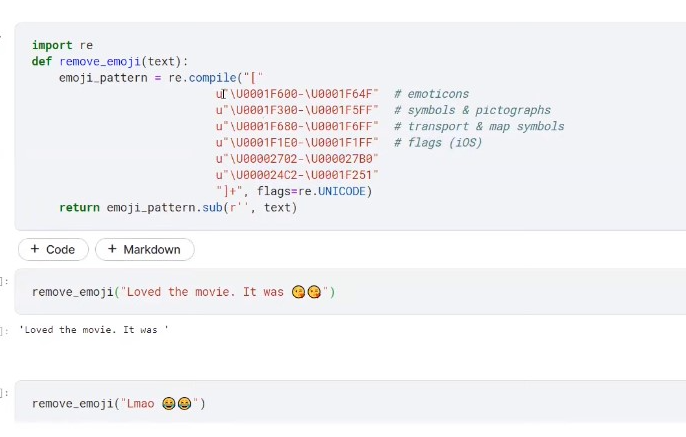

## Tokenization

In [31]:
# Using regular experision

sent = "I am going to Bangladesh"

tokens = re.findall(pattern=r"[\w]+", string=sent)

print(tokens)

['I', 'am', 'going', 'to', 'Bangladesh']


In [32]:
sent = "What a pity!. Let's do the work"

print(nltk.word_tokenize(text=sent))

['What', 'a', 'pity', '!', '.', 'Let', "'s", 'do', 'the', 'work']


In [33]:
# Using spacy

mysent = "I have a Ph.D in A.I"
mysent2 = "We're here to help! mail us at alamin321@gmail.com"
mysent3 = "A 5km ride cost $10.40"

In [34]:
# Use this line to download the particular package:  python -m spacy download en_core_web_sm

# Another if need: python -m spacy download en_core_web_lg

nlp = spacy.load("en_core_web_sm")

In [35]:
doc1 = nlp(mysent)
doc2 = nlp(mysent2)
doc3 = nlp(mysent3)

In [36]:
[i for i in doc1]

[I, have, a, Ph, ., D, in, A.I]

In [37]:
[i for i in doc2]

[We, 're, here, to, help, !, mail, us, at, alamin321@gmail.com]

In [38]:
[i for i in doc3]

[A, 5, km, ride, cost, $, 10.40]